# *Import Data*

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data = pd.read_excel('bengkel.xlsx')

data.head()

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4


# *Fuzzyfication*

Terdapat 2 Variable Linguistik yaitu Kualitas servis dan Harga

Dalam variable Kualitas servis terdapat 3 nilai linguistik yaitu Jelek, Biasa dan Bagus

Dalam variable Harga terdapat 3 nilai linguistik yaitu Murah, Sedang dan Mahal

Fungsi Membership Kualitas Servis
 - "Jelek" jika value ≤ 40
 - "Biasa" jika 30 ≤ value ≤ 70
 - "Bagus" jika 60 ≤ vallue ≤ 100

In [32]:
# Fungsi Keanggotaan Kualitas Servis
def fuzzificationService(value):
    kualitasServis = {"Jelek": 0, "Biasa": 0, "Bagus": 0}
    a,b,c,d,e = 30, 40, 60, 70, 100

    # garis datar
    if value <= a:
        kualitasServis["Jelek"] = 1
    if value >= b and value <= c:
        kualitasServis["Biasa"] = 1
    if value >= d and value <= e:
        kualitasServis["Bagus"] = 1

    #garis miring
    if value > a and value <= b:
        kualitasServis["Jelek"] = max(0, min((-(value - b) / (b - a), 1)))
    if value > a and value < b:
        kualitasServis["Biasa"] = max(0, min((value - a) / (b - a), 1))
    if value > c and value < d:
        kualitasServis["Biasa"] = max(0, min(-(value - d) / (d - c), 1))
    if value > c and value < d:
        kualitasServis["Bagus"] =  max(0, min((value - c) / (d - c), 1))

    return kualitasServis

Diagram nilai kualitas servis Menggunakan Fungsi Trapesium

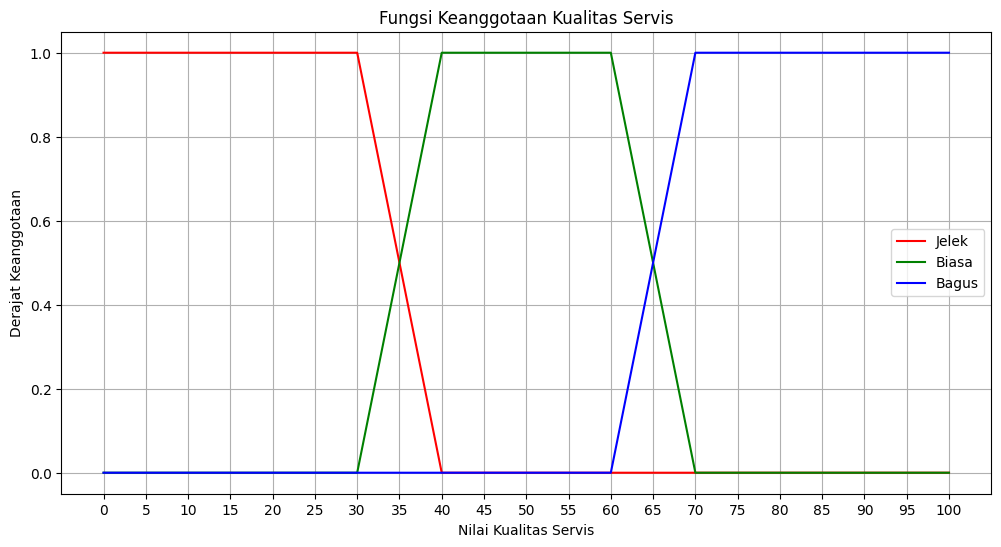

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Fungsi Keanggotaan Kualitas Servis')

plt.plot(range(101),[fuzzificationService(x)["Jelek"] for x in range(101)], "r")
plt.plot(range(101),[fuzzificationService(x)["Biasa"] for x in range(101)], "g")
plt.plot(range(101),[fuzzificationService(x)["Bagus"] for x in range(101)], "b")

plt.plot(0, 0, "r", linewidth = 1.5, label = "Jelek")
plt.plot(0, 0, "g", linewidth = 1.5, label = "Biasa")
plt.plot(0, 0, "b", linewidth = 1.5, label = "Bagus")

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel('Nilai Kualitas Servis')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

Fungsi Membership Harga
 - "Murah" jika value ≤ 5
 - "Sedang" jika 3 ≤ value ≤ 9
 - "Harga" jika 6 ≤ vallue ≤ 10

In [34]:
# Fungsi Keanggotaan Harga
def fuzzificationPrice(value):
    harga = {"Murah": 0,"Sedang": 0,"Mahal": 0}

    a,b,c,d,e = 3,5,6,8,10

    # garis datar
    if value <= a:
        harga["Murah"] = 1
    if value >= b and value <= c:
        harga["Sedang"] = 1
    if value >= d and value <= e:
        harga["Mahal"] = 1

    # garis miring
    if value > a and value < b:
        harga["Murah"] = max(0, min((-(value - b) / (b - a), 1)))
    if value > a and value < b:
        harga["Sedang"] = max(0, min((value - a) / (b - a), 1))
    if value > c and value < d:
        harga["Sedang"] = max(0, min(-(value - d) / (d - c), 1))
    if value > c and value < d:
        harga["Mahal"] = max(0, min((value - c) / (d - c), 1))

    return harga

Diagram nilai harga menggunakan Fungsi Trapesium

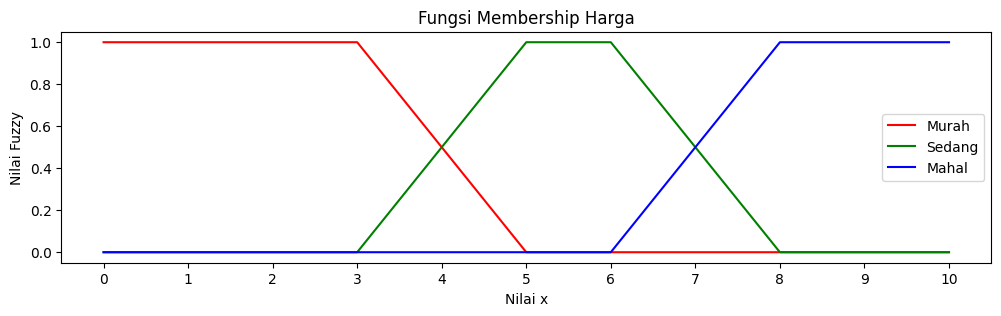

In [35]:
# Diagram nilai harga
plt.figure(figsize=(12,3))
plt.title("Fungsi Membership Harga")

plt.plot(range(11),[fuzzificationPrice(x)["Murah"] for x in range(11)], "r")
plt.plot(range(11),[fuzzificationPrice(x)["Sedang"] for x in range(11)], "g")
plt.plot(range(11),[fuzzificationPrice(x)["Mahal"] for x in range(11)], "b")

plt.plot(0, 0, "r", linewidth = 1.5, label = "Murah")
plt.plot(0, 0, "g", linewidth = 1.5, label = "Sedang")
plt.plot(0, 0, "b", linewidth = 1.5, label = "Mahal")

plt.xticks(list(range(11)))
plt.xlabel("Nilai x")
plt.ylabel("Nilai Fuzzy")
plt.legend()
plt.show()

Proses Fuzzifikasi

In [36]:
hasilFuzzifikasi = []

for servis, harga in zip(data["servis"], data["harga"]):
    nilaiFuzzy = {"Kualitas Servis": 0, "Harga": 0}
    nilaiFuzzy["Kualitas Servis"] = fuzzificationService(servis)
    nilaiFuzzy["Harga"] = fuzzificationPrice(harga)

    hasilFuzzifikasi.append(nilaiFuzzy)

In [37]:
# Menampilkan hasil dari proses Fuzzifikasi 5 data awal
i = 0
for i in range(5):
    print("Kualitas Servis: ", data["servis"][i])
    print("Harga: ", data["harga"][i])
    print("Nilai Kualitas Servis: ", hasilFuzzifikasi[i]["Kualitas Servis"])
    print("Nilai Harga: ", hasilFuzzifikasi[i]["Harga"], end = "\n\n")

Kualitas Servis:  58
Harga:  7
Nilai Kualitas Servis:  {'Jelek': 0, 'Biasa': 1, 'Bagus': 0}
Nilai Harga:  {'Murah': 0, 'Sedang': 0.5, 'Mahal': 0.5}

Kualitas Servis:  54
Harga:  1
Nilai Kualitas Servis:  {'Jelek': 0, 'Biasa': 1, 'Bagus': 0}
Nilai Harga:  {'Murah': 1, 'Sedang': 0, 'Mahal': 0}

Kualitas Servis:  98
Harga:  2
Nilai Kualitas Servis:  {'Jelek': 0, 'Biasa': 0, 'Bagus': 1}
Nilai Harga:  {'Murah': 1, 'Sedang': 0, 'Mahal': 0}

Kualitas Servis:  52
Harga:  4
Nilai Kualitas Servis:  {'Jelek': 0, 'Biasa': 1, 'Bagus': 0}
Nilai Harga:  {'Murah': 0.5, 'Sedang': 0.5, 'Mahal': 0}

Kualitas Servis:  11
Harga:  4
Nilai Kualitas Servis:  {'Jelek': 1, 'Biasa': 0, 'Bagus': 0}
Nilai Harga:  {'Murah': 0.5, 'Sedang': 0.5, 'Mahal': 0}



#  *Inference*

In [38]:
fuzzySet = {
    ('Murah', 'Jelek'): 'Tidak Direkomendasikan',
    ('Sedang', 'Jelek'): 'Tidak Direkomendasikan',
    ('Mahal', 'Jelek'): 'Tidak Direkomendasikan',
    ('Murah', 'Biasa'): 'Direkomendasikan',
    ('Sedang', 'Biasa'): 'Tidak Direkomendasikan',
    ('Mahal', 'Biasa'): 'Tidak Direkomendasikan',
    ('Murah', 'Bagus'): 'Sangat Direkomendasikan',
    ('Sedang', 'Bagus'): 'Sangat Direkomendasikan',
    ('Mahal', 'Bagus'): 'Direkomendasikan',
}

def interference(fuzzed):
    result = {'Nilai Fuzzy': 0, 'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

    for servis_label in fuzzed['Kualitas Servis']:
        for harga_label in fuzzed['Harga']:
            result["Nilai Fuzzy"] = {"Kualitas Servis": fuzzed["Kualitas Servis"], "Harga": fuzzed["Harga"]}

            # Assuming 'Fuzzy Harga' should be 'Harga'
            min_value = min(fuzzed['Harga'][harga_label], fuzzed['Kualitas Servis'][servis_label])

            # Proses Konjungsi sesuai fuzzy set rules
            output_label = fuzzySet[(harga_label, servis_label)]

            if min_value > result[output_label]:
                result[output_label] = min_value

    return result


In [39]:
# Proses Inference
hasilInterference = []

for fuzzed in hasilFuzzifikasi:
    hasilInterference.append(interference(fuzzed))

# Menampilkan hasil dari proses Interference 5 data awal
i = 0
for i in range(5):
    print({key: value for key, value in hasilInterference[i].items() if key in ["Tidak Direkomendasikan", "Direkomendasikan", "Sangat Direkomendasikan"]})

{'Tidak Direkomendasikan': 0.5, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 1}
{'Tidak Direkomendasikan': 0.5, 'Direkomendasikan': 0.5, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0.5, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}


# *Deffuzzification*

In [40]:
def defuzzification(interference_result):
    nilai_direkomendasikan = interference_result["Direkomendasikan"]
    nilai_tidak_direkomendasikan = interference_result["Tidak Direkomendasikan"]
    nilai_sangat_direkomendasikan = interference_result["Sangat Direkomendasikan"]

    total_nilai = nilai_direkomendasikan + nilai_tidak_direkomendasikan + nilai_sangat_direkomendasikan

    if total_nilai != 0:
        centroid = (nilai_tidak_direkomendasikan * 40 + nilai_direkomendasikan * 70 + nilai_sangat_direkomendasikan * 100.0) / total_nilai
    else:
        centroid = 0

    return centroid

In [41]:
# Proses Deffuzification
hasilDeffuzifikasi = []

for interference_result in hasilInterference:
    hasilDeffuzifikasi.append(defuzzification(interference_result))

In [42]:
# Menampilkan hasil deffuzifikasi 5 data awal
i = 0
for i in range(5):
    print("Hasil Deffuzifikasi:", hasilDeffuzifikasi[i])

Hasil Deffuzifikasi: 40.0
Hasil Deffuzifikasi: 70.0
Hasil Deffuzifikasi: 100.0
Hasil Deffuzifikasi: 55.0
Hasil Deffuzifikasi: 40.0


# *Output*

In [43]:
data['Skor Kelayakan'] = hasilDeffuzifikasi

data = data.sort_values(by=['Skor Kelayakan', 'servis', 'harga'], ascending=[False, False, True])[:5]

data[['id', 'servis', 'harga', 'Skor Kelayakan']].to_excel('peringkat.xls', index=False, header=True, engine='openpyxl')

data

,id,servis,harga,Skor Kelayakan
2,3,98,2,100.0
90,91,98,3,100.0
51,52,94,3,100.0
33,34,93,4,100.0
91,92,83,3,100.0
